# Polynomial Regression


- Polynomial Regression is an extension of Linear Regression where the relationship between the variables is modeled as a polynomial equation:

- 𝑦=𝛽0+𝛽1𝑥+𝛽2𝑥2+𝛽3𝑥3+⋯+𝛽𝑛𝑥𝑛+𝜀

- Here:
   - y is the predicted value
   - x is the input (independent variable)
   - 𝛽0,𝛽1,...,𝛽𝑛,β1,...,βn are the coefficients
   - ε is the error term


## Why Use Polynomial Regression?
- Linear regression can only model linear relationships, but real-world data often shows curves. Polynomial regression is used when:

- The data shows a non-linear trend

- You want to fit a curve to the data

## Visualization:
- Linear Regression: Straight line

- Polynomial Regression (degree 2 or 3): Parabola or cubic curve

## Pros:
- Can model non-linear data
Flexible by adjusting the degree of the polynomial

## Cons:
- Overfitting if the degree is too high
- Becomes computationally expensive for high degrees
- Sensitive to outliers

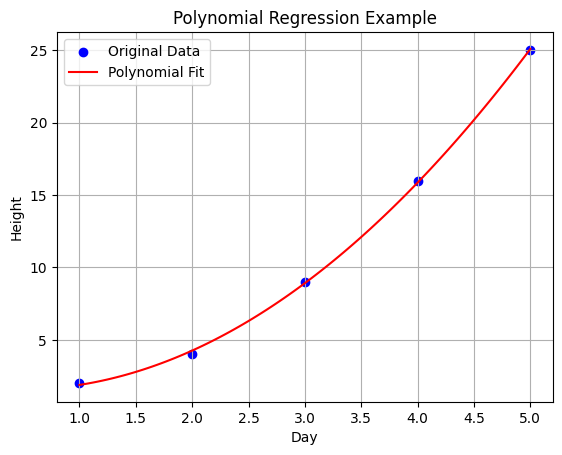

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data (x = day, y = plant height)
x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 9, 16, 25])

# Make polynomial features (degree 2 means x^2 terms)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)# fit only independent variables

# Train the model
model = LinearRegression()
model.fit(x_poly, y)

# Predict using the model
x_range = np.linspace(1, 5, 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_pred = model.predict(x_range_poly)

# Plotting
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x_range, y_pred, color='red', label='Polynomial Fit')
plt.xlabel('Day')
plt.ylabel('Height')
plt.title('Polynomial Regression Example')
plt.legend()
plt.grid(True)
plt.show()


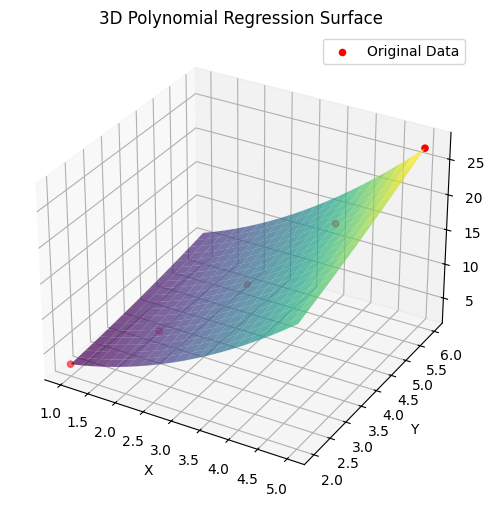

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D

# Sample 3D data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5, 6])
z = np.array([3, 6, 11, 18, 27])  # This could be something like z = x^2 + y

# Combine x and y into a matrix
X = np.column_stack((x, y))

# Create polynomial features (degree 2: includes x^2, y^2, xy)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, z)

# Make a grid for plotting
x_range = np.linspace(1, 5, 20)
y_range = np.linspace(2, 6, 20)
x_grid, y_grid = np.meshgrid(x_range, y_range)
X_grid = np.column_stack((x_grid.ravel(), y_grid.ravel()))
X_grid_poly = poly.transform(X_grid)
z_pred = model.predict(X_grid_poly).reshape(x_grid.shape)

# 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
ax.plot_surface(x_grid, y_grid, z_pred, alpha=0.7, cmap='viridis')
ax.scatter(x, y, z, color='red', label='Original Data')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Polynomial Regression Surface')
plt.legend()
plt.show()


In [ ]:
# Example 2

In [3]:
X = 6 * np.random.rand(200, 1) - 3 # X contains 200 random numbers between -3 and 3.
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)  # 

# y = 0.8x^2 + 0.9x + 2

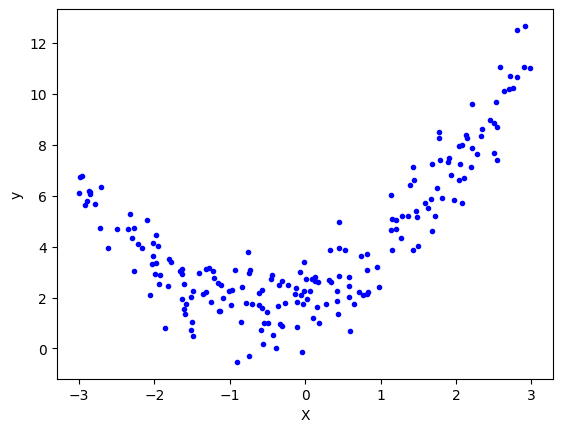

In [4]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [6]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
# Applying linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)
LinearRegression()
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.3153330466446881

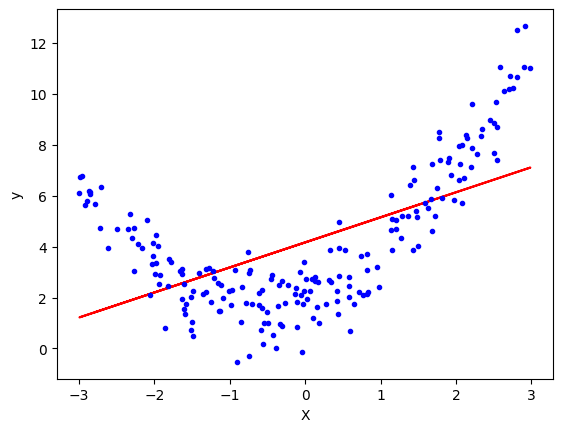

In [7]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [8]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True) # include_bias=True means it includes a column of 1s (like 𝑥0), which acts as the intercept (bias term) in the model.

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [9]:
print(X_train[0])
print(X_train_trans[0])

[-2.77999694]
[ 1.         -2.77999694  7.728383  ]


In [10]:
# include_bias parameter
lr = LinearRegression()
lr.fit(X_train_trans,y_train)
LinearRegression()
y_pred = lr.predict(X_test_trans)
r2_score(y_test,y_pred)
0.8332188324158399
print(lr.coef_)
print(lr.intercept_)


[[0.         0.91877101 0.80779776]]
[1.99645149]


In [11]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
# This creates 200 evenly spaced values between -3 and 3 (like a smooth X-axis line)..reshape(200, 1) makes it the right shape for model input.
X_new_poly = poly.transform(X_new)
# Transforms the new X values into polynomial form (adds x² if degree=2).This lets the model predict curved values instead of just straight lines.
y_new = lr.predict(X_new_poly)
# Uses the trained regression model (lr) to predict y values for the smooth line (X_new).These are your model’s predictions.

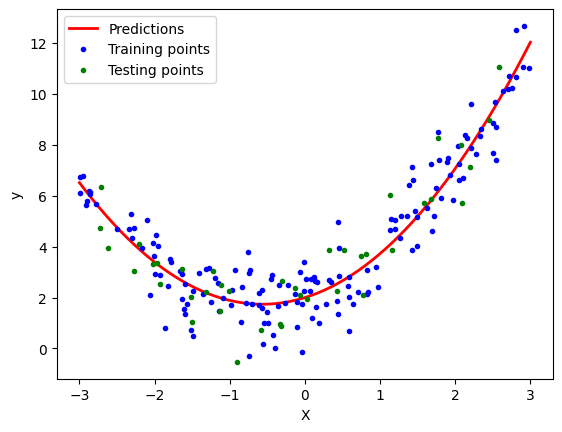

In [12]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [13]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

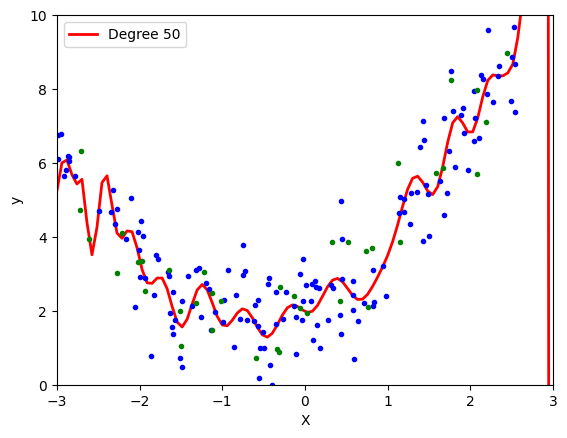

In [15]:
polynomial_regression(50)

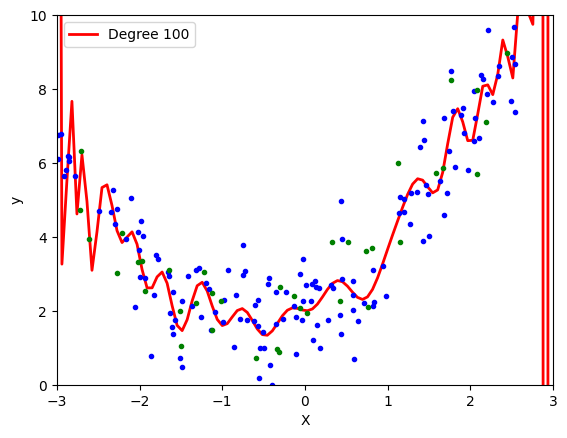

In [16]:
polynomial_regression(100)

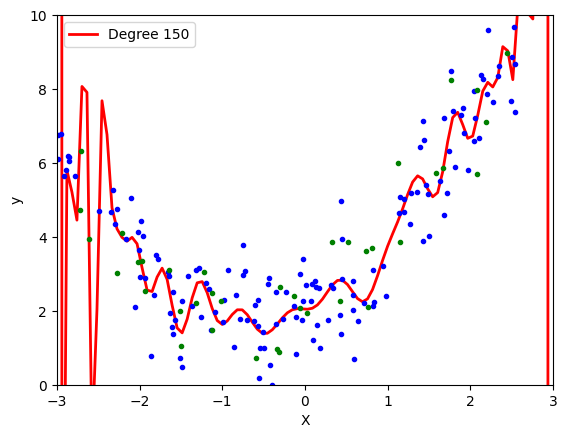

In [17]:
polynomial_regression(150)

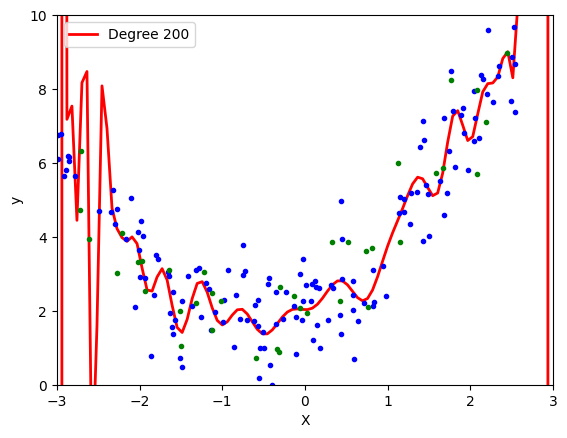

In [18]:
polynomial_regression(200)

c:\Users\Eden Computers\Desktop\ML Folder\venv2\Lib\site-packages\sklearn\utils\extmath.py:1120: RuntimeWarning: overflow encountered in square
  temp **= 2
c:\Users\Eden Computers\Desktop\ML Folder\venv2\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


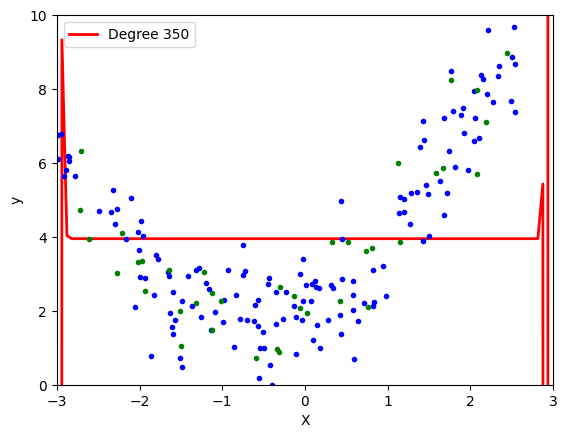

In [14]:
polynomial_regression(350)


In [19]:
poly.powers_

array([[0],
       [1],
       [2]])

In [21]:
# Applying Gradient Descent
poly = PolynomialFeatures(degree=2)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

# Converts your input X_train and X_test into polynomial form.

# Since degree = 2, it adds terms like 𝑥2 so the model can fit a curve.



In [23]:
# Fit Model Using Gradient Descent

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans, y_train)
# SGDRegressor is a model that uses Stochastic Gradient Descent (SGD) to find the best line/curve.max_iter=100 means it runs for 100 steps to adjust weights and minimize error.It fits the transformed training data using gradient descent.

c:\Users\Eden Computers\Desktop\ML Folder\venv2\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(max_iter=100)

In [25]:
# Make Predictions on Smooth Range
X_new = np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)
# Generates 200 smooth x-values from -2.9 to 2.8.
# Transforms them to polynomial form.Uses the trained model to predict y-values, creating the smooth prediction curve.

In [ ]:
 # Predict on Test Data

y_pred = sgd.predict(X_test_trans)
# Predicts y-values for the test dataset.
# These predictions will be used to calculate the model’s performance.

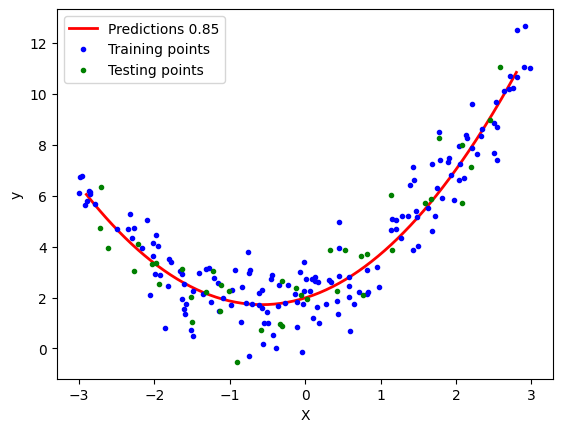

In [26]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.", label='Training points')
plt.plot(X_test, y_test, "g.", label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


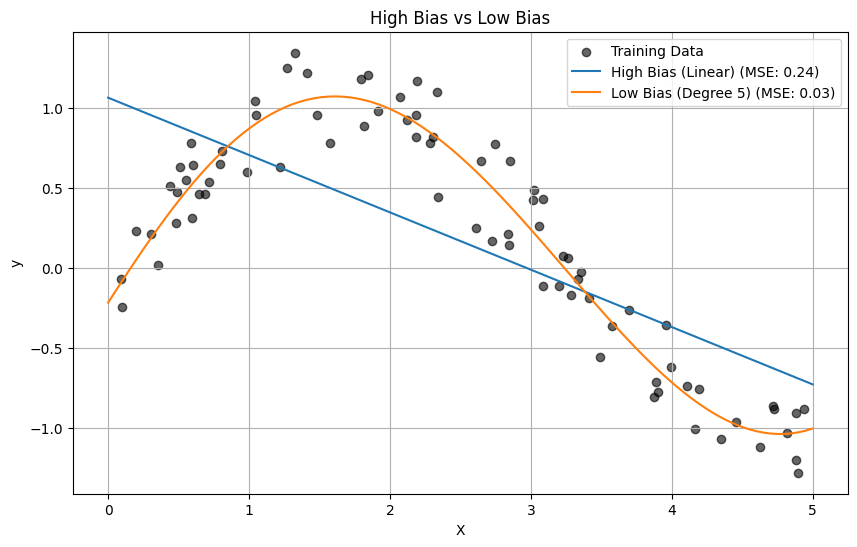

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Step 1: Generate non-linear data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])  # sine curve + noise

# Step 2: Define models
models = {
    "High Bias (Linear)": make_pipeline(PolynomialFeatures(1), LinearRegression()),
    "Low Bias (Degree 5)": make_pipeline(PolynomialFeatures(5), LinearRegression()),
}

# Step 3: Plot predictions
X_test = np.linspace(0, 5, 100).reshape(-1, 1)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label="Training Data", alpha=0.6)

for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y, model.predict(X))
    plt.plot(X_test, y_pred, label=f"{name} (MSE: {mse:.2f})")

plt.title("High Bias vs Low Bias")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


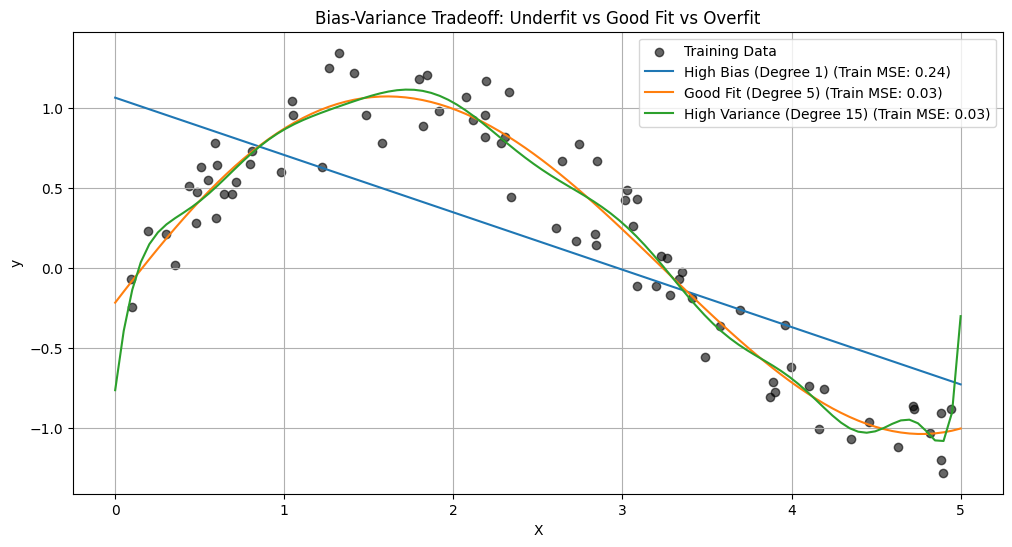

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Step 1: Generate nonlinear data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])  # true function + noise

# Step 2: Define models
models = {
    "High Bias (Degree 1)": make_pipeline(PolynomialFeatures(1), LinearRegression()),
    "Good Fit (Degree 5)": make_pipeline(PolynomialFeatures(5), LinearRegression()),
    "High Variance (Degree 15)": make_pipeline(PolynomialFeatures(15), LinearRegression()),
}

# Step 3: Plot predictions
X_test = np.linspace(0, 5, 100).reshape(-1, 1)

plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='black', label="Training Data", alpha=0.6)

for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y, model.predict(X))
    plt.plot(X_test, y_pred, label=f"{name} (Train MSE: {mse:.2f})")

plt.title("Bias-Variance Tradeoff: Underfit vs Good Fit vs Overfit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
